In [81]:


import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
import os
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score ,f1_score, ConfusionMatrixDisplay
import cv2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from PIL import Image
import numpy as np

In [73]:
Categories=['benign','malignant']
flat_data_arr=[] #input array
target_arr=[] #output array
flat_data_arr_test=[] #input array
target_arr_test=[] #output array
datadir='../Dataset/train/'



# read train dataaaaaa
for i in Categories:
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_resized=cv2.resize(img_array,(150,150))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)



datadir='../Dataset/test/' 

# read train dataaaaaa
for i in Categories:
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_resized=cv2.resize(img_array,(150,150))
        flat_data_arr_test.append(img_resized.flatten())
        target_arr_test.append(Categories.index(i))
flat_data_arr_test=np.array(flat_data_arr_test)
target_test=np.array(target_arr_test)

In [74]:
X=flat_data
Y=target


X_train , y_train  = X,Y
X_test=flat_data_arr_test
y_test=target_test

In [83]:
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.1, 1, 10],  # Inverse of regularization strength
    'solver': ['liblinear'],  # Solver algorithm
    'max_iter': [100, 200, 500]

}

logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters: ", grid_search.best_params_)

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))


In [62]:
y_pred= logmodel.predict(X_test)



In [76]:
acc=accuracy_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
print('Accuracy:',acc)
print('recall:',recall)
print('Precision:',precision)
print('F1_Score:',f1)

Accuracy: 0.7757575757575758
recall: 0.72
Precision: 0.7714285714285715
F1_Score: 0.7448275862068965


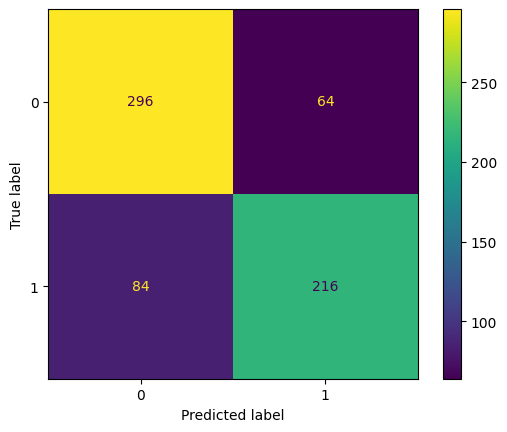

In [82]:

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [77]:
CM = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:')
print(CM)

Confusion Matrix:
[[296  64]
 [ 84 216]]
